In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# importando o dataset
df_poluicao_beijing = pd.read_csv('Dataset/PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
# conhecendo o dataset
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
# verificando o shape do dataset
df_poluicao_beijing.shape

(43824, 13)

In [5]:
df_poluicao_beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [10]:
# contando os valores nulos
df_poluicao_beijing.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [11]:
# obtendo os daods em formato datetime
df_poluicao_beijing['datetime'] = df_poluicao_beijing[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year = row['year'], month = row['month'], day = row['day'], hour = row['hour']), axis = 1)

In [12]:
# mostrando a modificação
df_poluicao_beijing.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [14]:
# encontrando as datas max e min do dataset
print(df_poluicao_beijing['datetime'].min())
print(df_poluicao_beijing['datetime'].max())

2010-01-01 00:00:00
2014-12-31 23:00:00


In [15]:
# criando df para guardar a pressão e periodo
df_pressao_atmosferica = df_poluicao_beijing[['datetime', 'PRES']]
df_pressao_atmosferica.head()

,datetime,PRES
0,2010-01-01 00:00:00,1021.0
1,2010-01-01 01:00:00,1020.0
2,2010-01-01 02:00:00,1019.0
3,2010-01-01 03:00:00,1019.0
4,2010-01-01 04:00:00,1018.0


In [17]:
df_pressao_atmosferica.sort_values('datetime', ascending = True, inplace = True)

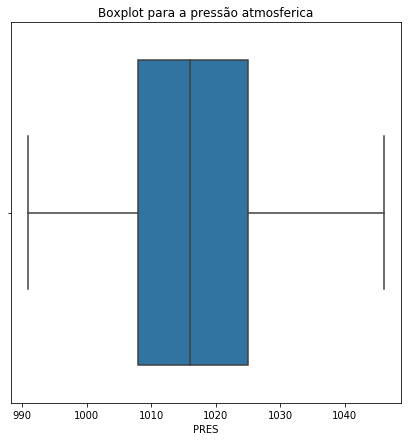

In [19]:
# verificando possiveis outliers
plt.figure(figsize = (7, 7))
g = sns.boxplot(df_pressao_atmosferica['PRES'])
g.set_title('Boxplot para a pressão atmosferica')
plt.show()

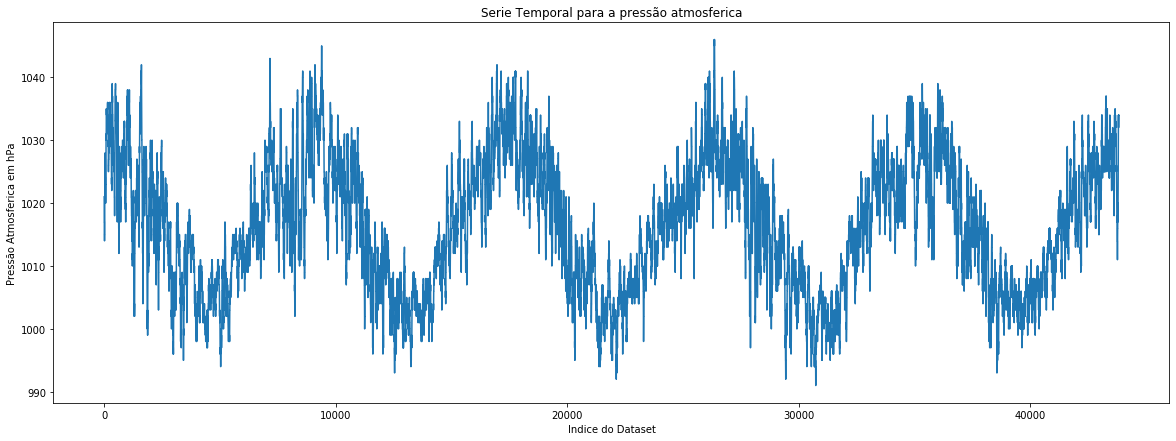

In [22]:
# plotando os valores da pressão atmosferica
plt.figure(figsize = (20, 7))
g = sns.lineplot(x = df_pressao_atmosferica.index, y = df_pressao_atmosferica['PRES'])
g.set_title('Serie Temporal para a pressão atmosferica')
g.set_xlabel('Indice do Dataset')
g.set_ylabel('Pressão Atmosferica em hPa')
plt.show()

## Preparando os dados para serem utilizados no modelo MLP

In [25]:
# normalização dos dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df_pressao_atmosferica['PRES_normalizado'] = scaler.fit_transform(np.array(df_pressao_atmosferica['PRES']).reshape(-1, 1))

In [26]:
df_pressao_atmosferica.head()

,datetime,PRES,PRES_normalizado
0,2010-01-01 00:00:00,1021.0,0.545455
1,2010-01-01 01:00:00,1020.0,0.527273
2,2010-01-01 02:00:00,1019.0,0.509091
3,2010-01-01 03:00:00,1019.0,0.509091
4,2010-01-01 04:00:00,1018.0,0.490909


In [30]:
# dividindo os dados em treino e teste
data_corte = datetime.datetime(year = 2014, month = 1, day = 1, hour = 0)
df_treinamento = df_pressao_atmosferica.loc[df_pressao_atmosferica['datetime'] < data_corte]
df_teste = df_pressao_atmosferica.loc[df_pressao_atmosferica['datetime'] >= data_corte]
print('Dados de Treinamento', df_treinamento.shape)
print('Dados de Teste', df_teste.shape)

Dados de Treinamento (35064, 3)
Dados de Teste (8760, 3)


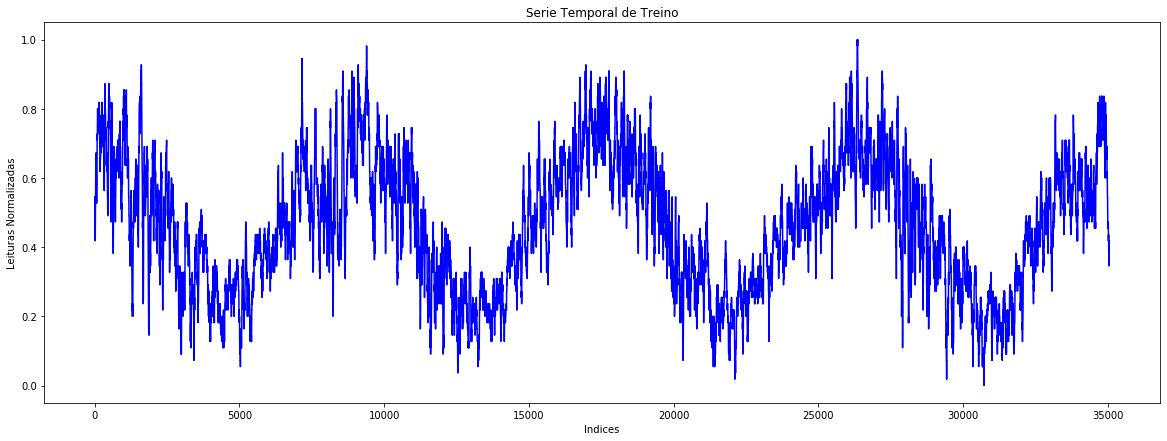

In [32]:
# verificando a distriuição dos dados de treino
plt.figure(figsize = (20, 7))
g = sns.lineplot(x = df_treinamento.index, y = df_treinamento['PRES_normalizado'], color = 'b')
g.set_title('Serie Temporal de Treino')
g.set_xlabel('Indices')
g.set_ylabel('Leituras Normalizadas')
plt.show()

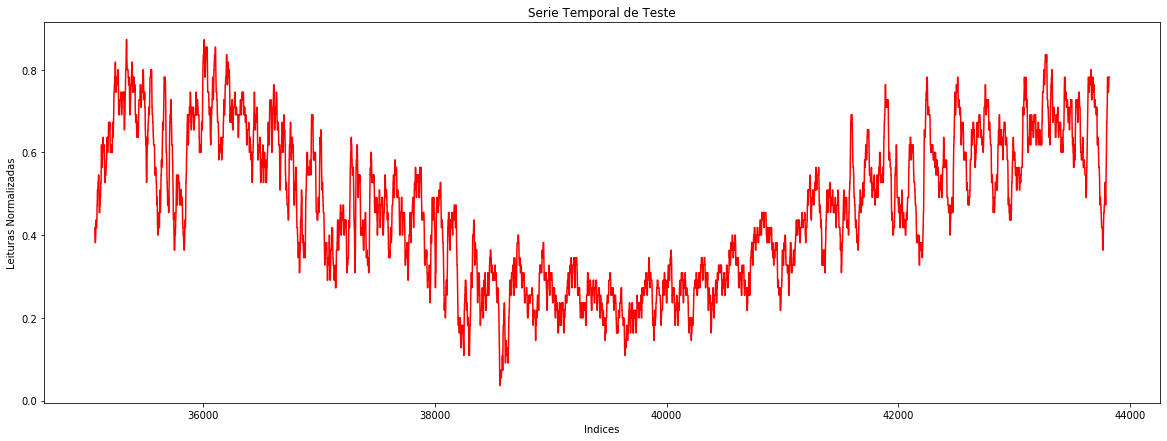

In [33]:
# verificando a distriuição dos dados de teste
plt.figure(figsize = (20, 7))
g = sns.lineplot(x = df_teste.index, y = df_teste['PRES_normalizado'], color = 'r')
g.set_title('Serie Temporal de Teste')
g.set_xlabel('Indices')
g.set_ylabel('Leituras Normalizadas')
plt.show()

In [34]:
# definindo o numero de valores a serem utilizados para previsão
def formata_entrada_serie(seria_temporal_original, numero_passos):
    x = []
    y = []
    for i in range(numero_passos, seria_temporal_original.shape[0]):
        x.append(list(seria_temporal_original.loc[i - numero_passos: i - 1]))
        y.append(seria_temporal_original.loc[i])
    x, y = np.array(x), np.array(y)
    return x, y

In [38]:
# formata os dados para o treinamento do modelo
x_train, y_train = formata_entrada_serie(df_treinamento['PRES_normalizado'], 10)
print(x_train.shape, y_train.shape)

(35054, 10) (35054,)


In [41]:
# formata os dados para o teste do modelo
x_test, y_test = formata_entrada_serie(df_teste['PRES_normalizado'].reset_index(drop = True), 10)
print(x_test.shape, y_test.shape)

(8750, 10) (8750,)


## Iniciando o processo de construção do modelo MLP

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD

In [47]:
# define a camada de entrada
camada_entrada = Input(shape = (10,), dtype = 'float32')

In [49]:
# define as camadas escondidas
densa1 = Dense(32, activation = 'linear')(camada_entrada)
densa2 = Dense(16, activation = 'linear')(densa1)
densa3 = Dense(16, activation = 'linear')(densa2)

In [50]:
# adiciona a camada dropout como forma de regularização do modelo (ajuda a evitar overfitting)
camada_dropout = Dropout(0.2)(densa3)

In [51]:
# camada de saida da rede (1 dimensão, pois queremos prever a pressão atmosferica anteriores)
camada_saida = Dense(1, activation = 'linear')(camada_dropout)

In [52]:
# definindo o modelo MLP
modelo_MLP = tf.keras.Model(inputs = camada_entrada, outputs = camada_saida)

In [53]:
# mostrando as caracteristicas do modelo
modelo_MLP.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
___________________________________________________________

In [55]:
# definindo a função de erro e o otimizador a ser utilizado
modelo_MLP.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [56]:
# treina o modelo 
modelo_MLP.fit(x = x_train, y = y_train, batch_size = 16, epochs = 20, verbose = 1, shuffle = True)

Epoch 1/20
2191/2191 [==============================] - 3s 1ms/step - loss: 0.0042
Epoch 2/20
2191/2191 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 3/20
2191/2191 [==============================] - 4s 2ms/step - loss: 8.7384e-04
Epoch 4/20
2191/2191 [==============================] - 4s 2ms/step - loss: 8.2587e-04
Epoch 5/20
2191/2191 [==============================] - 4s 2ms/step - loss: 8.2203e-04
Epoch 6/20
2191/2191 [==============================] - 3s 2ms/step - loss: 7.7121e-04
Epoch 7/20
2191/2191 [==============================] - 4s 2ms/step - loss: 7.7176e-04
Epoch 8/20
2191/2191 [==============================] - 4s 2ms/step - loss: 7.6914e-04
Epoch 9/20
2191/2191 [==============================] - 4s 2ms/step - loss: 7.7459e-04
Epoch 10/20
2191/2191 [==============================] - 4s 2ms/step - loss: 7.7601e-04
Epoch 11/20
2191/2191 [==============================] - 4s 2ms/step - loss: 7.5498e-04
Epoch 12/20
2191/2191 [==========================

In [58]:
# realizar previsão do modelo
previsao = modelo_MLP.predict(x_test)
previsao_PRES = scaler.inverse_transform(previsao)
previsao_PRES.shape

(8750, 1)

In [60]:
previsao_PRES = np.squeeze(previsao_PRES)
previsao_PRES.shape

(8750,)

In [59]:
# importa o coeficienta de determinação
from sklearn.metrics import r2_score

In [62]:
r2 = r2_score(df_teste['PRES'].iloc[10:], previsao_PRES)
print('Coeficiente de Determinação para MLP: ', round(r2,4))

Coeficiente de Determinação para MLP:  0.9953


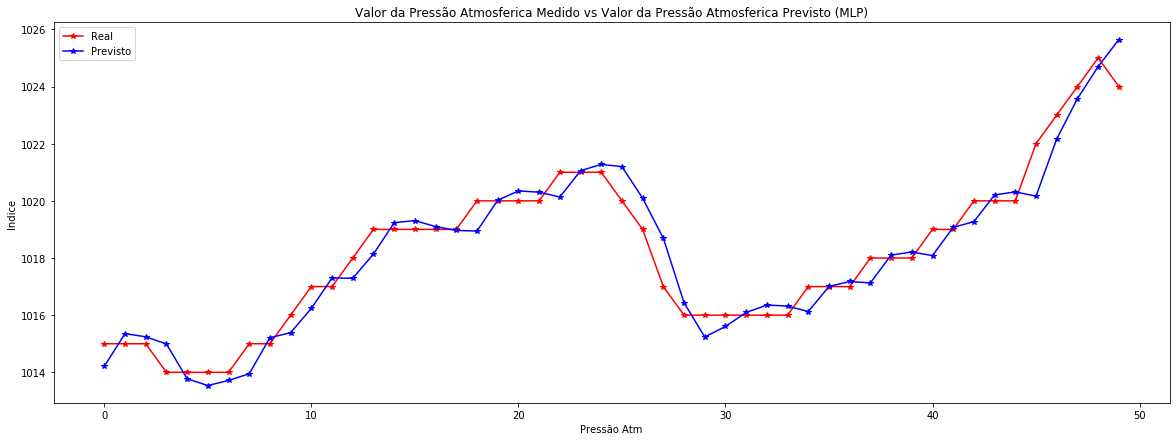

In [67]:
# plotando os valores Reais x Previstos
plt.figure(figsize = (20, 7))
plt.plot(range(50), df_teste['PRES'].iloc[10:60], linestyle = '-', marker = '*', color = 'r')
plt.plot(range(50), previsao_PRES[: 50], linestyle = '-', marker = '*', color = 'b')
plt.legend(['Real', 'Previsto'], loc = 2)
plt.title('Valor da Pressão Atmosferica Medido vs Valor da Pressão Atmosferica Previsto (MLP)')
plt.xlabel('Pressão Atm')
plt.ylabel('Indice')
plt.show()

## Iniciando o processo de previsão CNN (Redes Convolucionárias)

In [69]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ZeroPadding1D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import AveragePooling1D

In [70]:
# define a camada de entrada
camada_entrada = Input(shape = (10, 1), dtype = 'float32')

In [72]:
# define a camada padding
camada_padding = ZeroPadding1D(padding = 1)(camada_entrada)

In [73]:
# define camada de convolução
camada_convolucao_id = Conv1D(64, 3, strides = 1, use_bias = True)(camada_padding)

In [74]:
# define camada de pooling
camada_pooling = AveragePooling1D(pool_size = 3, strides = 1)(camada_convolucao_id)

In [75]:
# define camada flatten
camada_flatten = Flatten()(camada_pooling)

In [76]:
# adicionando a camada dropout
camada_dropout_cnn = Dropout(0.2)(camada_flatten)

In [77]:
# camada saida
camada_saida = Dense(1, activation = 'linear')(camada_dropout_cnn)

In [82]:
# construinido o modelo
modelo_CNN = tf.keras.Model(inputs = camada_entrada, outputs = camada_saida)

In [83]:
modelo_CNN.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 12, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 64)            256       
_________________________________________________________________
average_pooling1d (AveragePo (None, 8, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513 

In [86]:
# adicionando o função perda e otimizador
modelo_CNN.compile(loss = 'mean_absolute_error', optimizer = 'adam')

In [88]:
# transformando os dados de treino e teste para o formato 3D, pois a rede CNN exige essa transformação
x_train, x_test = x_train.reshape(x_train.shape[0], x_train.shape[1], 1), x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_train.shape, x_test.shape)

(35054, 10, 1) (8750, 10, 1)


In [90]:
# realizando o treinmento do modelo
modelo_CNN.fit(x = x_train, y = y_train, batch_size = 16, epochs = 20, verbose = 1, shuffle = True)

Epoch 1/20
2191/2191 [==============================] - 5s 2ms/step - loss: 0.0255
Epoch 2/20
2191/2191 [==============================] - 5s 2ms/step - loss: 0.0170
Epoch 3/20
2191/2191 [==============================] - 4s 2ms/step - loss: 0.0150
Epoch 4/20
2191/2191 [==============================] - 4s 2ms/step - loss: 0.0145
Epoch 5/20
2191/2191 [==============================] - 4s 2ms/step - loss: 0.0141
Epoch 6/20
2191/2191 [==============================] - 4s 2ms/step - loss: 0.0137
Epoch 7/20
2191/2191 [==============================] - 5s 2ms/step - loss: 0.0136
Epoch 8/20
2191/2191 [==============================] - 5s 2ms/step - loss: 0.0134
Epoch 9/20
2191/2191 [==============================] - 5s 2ms/step - loss: 0.0135
Epoch 10/20
2191/2191 [==============================] - 5s 2ms/step - loss: 0.0133
Epoch 11/20
2191/2191 [==============================] - 5s 2ms/step - loss: 0.0134
Epoch 12/20
2191/2191 [==============================] - 5s 2ms/step - loss: 0.0133
E

In [91]:
# realiza previsão
previsao_CNN = modelo_CNN.predict(x_test)
PRES_cnn = np.squeeze(scaler.inverse_transform(previsao_CNN))

In [92]:
r2 = r2_score(df_teste['PRES'].iloc[10:], previsao_PRES)
print('Coeficiente de Determinação para CNN: ', round(r2,4))

Coeficiente de Determinação para CNN:  0.9953


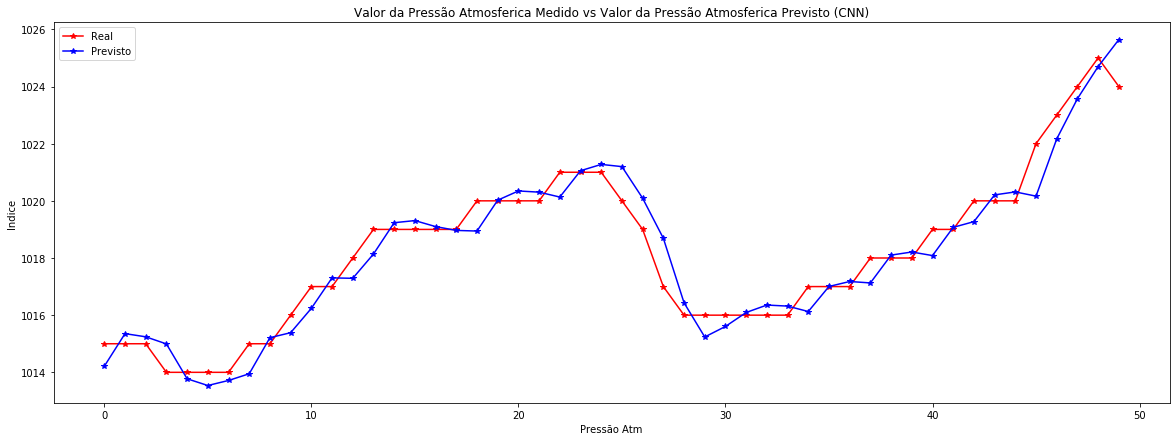

In [93]:
# plotando os valores Reais x Previstos
plt.figure(figsize = (20, 7))
plt.plot(range(50), df_teste['PRES'].iloc[10:60], linestyle = '-', marker = '*', color = 'r')
plt.plot(range(50), previsao_PRES[: 50], linestyle = '-', marker = '*', color = 'b')
plt.legend(['Real', 'Previsto'], loc = 2)
plt.title('Valor da Pressão Atmosferica Medido vs Valor da Pressão Atmosferica Previsto (CNN)')
plt.xlabel('Pressão Atm')
plt.ylabel('Indice')
plt.show()